# -----------------------
# Data Exploration & Visualization.
# -----------------------

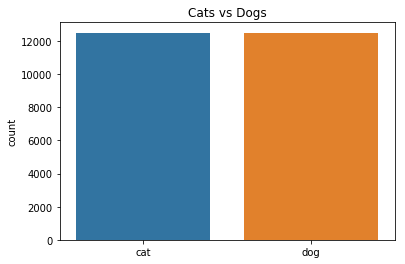

In [1]:
# Data exploration
from pathlib import Path

import os
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

FOLDER_TRN = Path('train/')

fnames = os.listdir(FOLDER_TRN)
labels = []
for fname in fnames:
    labels.append(fname.split('.')[0])

sns.countplot(labels)
plt.title('Cats vs Dogs');

# -----------------------
# Dogs & Cats Category Codes In ImageNet.
# -----------------------

In [2]:
dogs_code = [
    'n02085620','n02085782','n02085936','n02086079',
    'n02086240','n02086646','n02086910','n02087046',
    'n02087394','n02088094','n02088238','n02088364',
    'n02088466','n02088632','n02089078','n02089867',
    'n02089973','n02090379','n02090622','n02090721',
    'n02091032','n02091134','n02091244','n02091467',
    'n02091635','n02091831','n02092002','n02092339',
    'n02093256','n02093428','n02093647','n02093754',
    'n02093859','n02093991','n02094114','n02094258',
    'n02094433','n02095314','n02095570','n02095889',
    'n02096051','n02096177','n02096294','n02096437',
    'n02096585','n02097047','n02097130','n02097209',
    'n02097298','n02097474','n02097658','n02098105',
    'n02098286','n02098413','n02099267','n02099429',
    'n02099601','n02099712','n02099849','n02100236',
    'n02100583','n02100735','n02100877','n02101006',
    'n02101388','n02101556','n02102040','n02102177',
    'n02102318','n02102480','n02102973','n02104029',
    'n02104365','n02105056','n02105162','n02105251',
    'n02105412','n02105505','n02105641','n02105855',
    'n02106030','n02106166','n02106382','n02106550',
    'n02106662','n02107142','n02107312','n02107574',
    'n02107683','n02107908','n02108000','n02108089',
    'n02108422','n02108551','n02108915','n02109047',
    'n02109525','n02109961','n02110063','n02110185',
    'n02110341','n02110627','n02110806','n02110958',
    'n02111129','n02111277','n02111500','n02111889',
    'n02112018','n02112137','n02112350','n02112706',
    'n02113023','n02113186','n02113624','n02113712',
    'n02113799','n02113978'
]

cats_code = [
    'n02123045','n02123159','n02123394','n02123597',
    'n02124075','n02125311','n02127052'
]

# -----------------------------
# GPU Resources
# -----------------------------

In [3]:
# checkout GPU
!nvidia-smi

Sun Aug 25 03:30:48 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.40.04    Driver Version: 418.40.04    CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           On   | 00000000:00:1E.0 Off |                    0 |
| N/A   35C    P8    26W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

# -----------------------------
# Data Cleaning
# -----------------------------

In [4]:
# Using pretrained models to find out abnormal images
from keras.preprocessing import image
from keras.applications import Xception, xception, InceptionV3, inception_v3, ResNet50, resnet50, InceptionResNetV2, inception_resnet_v2, \
    NASNetLarge, nasnet

import numpy as np
import tensorflow as tf
import keras.backend.tensorflow_backend as KTF


KTF.set_session(tf.Session(config=tf.ConfigProto(device_count={'gpu':0})))

CF_FOLDER = Path('cheatfiles/')


def find_out_cheat_files(model, preprocess_func, decode, img_size):
    """
        use pretrained model(on imagenet) to find out images that may confuse my model in later training step.
    """
    
    cheat_files = []
    for fname in fnames:
        category = cats_code if fname.split('.')[0] == 'cat' else dogs_code
        img_path = FOLDER_TRN / fname
        img = image.load_img(img_path, target_size=img_size)
        arr = image.img_to_array(img)
        tensor = np.expand_dims(arr, axis=0)
        tensor = preprocess_func(tensor)
        preds = model.predict(tensor)
        preds_decode, _, __ = zip(*decode(preds, top=30)[0])

        if not np.intersect1d(preds_decode, category).size:
            cheat_files.append(fname)
    
    return cheat_files

Using TensorFlow backend.


In [10]:
# Found out by Xception
cheatfiles_xception = find_out_cheat_files(
    model=Xception(weights='imagenet'),
    preprocess_func=xception.preprocess_input,
    decode=xception.decode_predictions,
    img_size=(299, 299)
)

In [14]:
# Record the identification by Xception
np.savez(CF_FOLDER / 'xception_top30.npz', xception=cheatfiles_xception)

In [5]:
cheatfiles_xception = np.load(CF_FOLDER / 'xception_top30.npz')['xception']

In [6]:
len(cheatfiles_xception)

103

In [16]:
# Found out by inception_v3
cheatfiles_inception_v3 = find_out_cheat_files(
    model=InceptionV3(weights='imagenet'), 
    preprocess_func=inception_v3.preprocess_input, 
    decode=inception_v3.decode_predictions,
    img_size=(299, 299)
)

In [18]:
# Record the identification by InceptionV3
np.savez(CF_FOLDER / 'inception_v3_top30.npz', inception_v3=cheatfiles_inception_v3)

In [6]:
cheatfiles_inception_v3 = np.load(CF_FOLDER / 'inception_v3_top30.npz')['inception_v3']

In [8]:
len(cheatfiles_inception_v3)

147

In [19]:
# Found out by resnet50
cheatfiles_resnet50 = find_out_cheat_files(
    model=ResNet50(weights='imagenet'), 
    preprocess_func=resnet50.preprocess_input, 
    decode=resnet50.decode_predictions, 
    img_size=(224, 224)
)

In [21]:
# Record the identification by ResNet50
np.savez(CF_FOLDER / 'resnet50_top30.npz', resnet50=cheatfiles_resnet50)

In [7]:
cheatfiles_resnet50 = np.load(CF_FOLDER / 'resnet50_top30.npz')['resnet50']

In [10]:
len(cheatfiles_resnet50)

325

In [8]:
# Found out by NASNetMobile
cheatfiles_nasnet = find_out_cheat_files(
    model=NASNetLarge(weights='imagenet'), 
    preprocess_func=nasnet.preprocess_input, 
    decode=nasnet.decode_predictions, 
    img_size=(331, 331)
)

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
# Record the identification by NASNetMobile
np.savez(CF_FOLDER / 'nasnet_top30.npz', nasnet=cheatfiles_nasnet)

In [8]:
cheatfiles_nasnet = np.load(CF_FOLDER / 'nasnet_top30.npz')['nasnet']

In [11]:
len(cheatfiles_nasnet)

96

In [6]:
# Found out by InceptionResNetV2
cheatfiles_inception_resnet_v2 = find_out_cheat_files(
    model=InceptionResNetV2(weights='imagenet'), 
    preprocess_func=inception_resnet_v2.preprocess_input, 
    decode=inception_resnet_v2.decode_predictions, 
    img_size=(299, 299)
)

In [17]:
# Record the identification by InceptionResNet50V2
np.savez(CF_FOLDER / 'inception_resnet_v2_top30.npz', inception_resnet_v2=cheatfiles_inception_resnet_v2)

In [9]:
cheatfiles_inception_resnet_v2 = np.load(CF_FOLDER / 'inception_resnet_v2_top30.npz')['inception_resnet_v2']

In [16]:
len(cheatfiles_inception_resnet_v2)

124

In [10]:
# Aggregate all the files that found out by above pretrained models
from pprint import pprint
from functools import reduce


cheat_files_by_models = reduce(
    np.union1d, 
    (cheatfiles_xception, cheatfiles_inception_v3, cheatfiles_inception_resnet_v2, cheatfiles_resnet50, cheatfiles_nasnet)
)

print("models found out {} cheat files below:".format(len(cheat_files_by_models)))
pprint(cheat_files_by_models)

models found out 416 cheat files below:
array(['cat.10029.jpg', 'cat.10037.jpg', 'cat.10107.jpg', 'cat.10121.jpg',
       'cat.10209.jpg', 'cat.10220.jpg', 'cat.10266.jpg', 'cat.10270.jpg',
       'cat.10365.jpg', 'cat.10425.jpg', 'cat.10471.jpg', 'cat.10521.jpg',
       'cat.10532.jpg', 'cat.10536.jpg', 'cat.10539.jpg', 'cat.10579.jpg',
       'cat.10609.jpg', 'cat.10634.jpg', 'cat.10636.jpg', 'cat.10700.jpg',
       'cat.10712.jpg', 'cat.10743.jpg', 'cat.10807.jpg', 'cat.10863.jpg',
       'cat.10864.jpg', 'cat.10893.jpg', 'cat.10912.jpg', 'cat.10932.jpg',
       'cat.10946.jpg', 'cat.11018.jpg', 'cat.11039.jpg', 'cat.11062.jpg',
       'cat.11141.jpg', 'cat.11168.jpg', 'cat.11184.jpg', 'cat.11222.jpg',
       'cat.11231.jpg', 'cat.11255.jpg', 'cat.11256.jpg', 'cat.11281.jpg',
       'cat.11297.jpg', 'cat.1139.jpg', 'cat.11399.jpg', 'cat.114.jpg',
       'cat.11432.jpg', 'cat.11544.jpg', 'cat.11562.jpg', 'cat.11565.jpg',
       'cat.11607.jpg', 'cat.11608.jpg', 'cat.11634.jpg', 'cat.

In [11]:
# Record the identification by all models
np.savez(CF_FOLDER / 'models_all_top30.npz', all=cheat_files_by_models)

In [5]:
cheat_files_by_models = np.load(CF_FOLDER / 'models_all_top30.npz')['all']

In [6]:
# Abnormal images listed on kaggle discussion forum
import pandas as pd

from pprint import pprint

# The following files listed on discussion forum for reference
df_cheat = pd.read_csv('cheat.csv')
arr_cheat = df_cheat['filename'].values
arr_cheat = [name + '.jpg' for name in arr_cheat if not name.endswith('.jpg')]
print("furthermore, there are {} cheat files collected by discussion forum:".format(len(arr_cheat)))
pprint(arr_cheat)

furthermore, there are 49 cheat files collected by discussion forum:
['dog.11731.jpg',
 'dog.4334.jpg',
 'cat.4688.jpg',
 'cat.11222.jpg',
 'cat.1450.jpg',
 'cat.2159.jpg',
 'cat.3822.jpg',
 'cat.4104.jpg',
 'cat.5355.jpg',
 'cat.7194.jpg',
 'cat.7920.jpg',
 'cat.9250.jpg',
 'cat.9444.jpg',
 'cat.9882.jpg',
 'dog.11538.jpg',
 'dog.11724.jpg',
 'dog.8507.jpg',
 'cat.2939.jpg',
 'cat.3216.jpg',
 'cat.4833.jpg',
 'cat.7968.jpg',
 'cat.8470.jpg',
 'dog.10161.jpg',
 'dog.10190.jpg',
 'dog.11186.jpg',
 'dog.1308.jpg',
 'dog.1895.jpg',
 'dog.9188.jpg',
 'cat.5418.jpg',
 'dog.10747.jpg',
 'dog.2614.jpg',
 'dog.4367.jpg',
 'dog.8736.jpg',
 'cat.7377.jpg',
 'dog.12376.jpg',
 'dog.1773.jpg',
 'cat.10712.jpg',
 'cat.11184.jpg',
 'cat.7564.jpg',
 'cat.8456.jpg',
 'dog.10237.jpg',
 'dog.1043.jpg',
 'dog.1194.jpg',
 'dog.5604.jpg',
 'dog.9517.jpg',
 'cat.11565.jpg',
 'dog.10797.jpg',
 'dog.2877.jpg',
 'dog.8898.jpg']


In [7]:
# Cheat files aggregation
cheatfiles_all = np.union1d(cheat_files_by_models, arr_cheat)
print("From the above, there are {} cheat files in all, as below:".format(len(cheatfiles_all)))
pprint(cheatfiles_all)

From the above, there are 428 cheat files in all, as below:
array(['cat.10029.jpg', 'cat.10037.jpg', 'cat.10107.jpg', 'cat.10121.jpg',
       'cat.10209.jpg', 'cat.10220.jpg', 'cat.10266.jpg', 'cat.10270.jpg',
       'cat.10365.jpg', 'cat.10425.jpg', 'cat.10471.jpg', 'cat.10521.jpg',
       'cat.10532.jpg', 'cat.10536.jpg', 'cat.10539.jpg', 'cat.10579.jpg',
       'cat.10609.jpg', 'cat.10634.jpg', 'cat.10636.jpg', 'cat.10700.jpg',
       'cat.10712.jpg', 'cat.10743.jpg', 'cat.10807.jpg', 'cat.10863.jpg',
       'cat.10864.jpg', 'cat.10893.jpg', 'cat.10912.jpg', 'cat.10932.jpg',
       'cat.10946.jpg', 'cat.11018.jpg', 'cat.11039.jpg', 'cat.11062.jpg',
       'cat.11141.jpg', 'cat.11168.jpg', 'cat.11184.jpg', 'cat.11222.jpg',
       'cat.11231.jpg', 'cat.11255.jpg', 'cat.11256.jpg', 'cat.11281.jpg',
       'cat.11297.jpg', 'cat.1139.jpg', 'cat.11399.jpg', 'cat.114.jpg',
       'cat.11432.jpg', 'cat.11544.jpg', 'cat.11562.jpg', 'cat.11565.jpg',
       'cat.11607.jpg', 'cat.11608.jpg', 'c

# -----------------------
# Dirty Data Visualization
# -----------------------

In [13]:
# Function that let us see some abnormal images
def view_of_cheat_files(nrows, ncols, start, end):
    if abs(end - start) > nrows * ncols:
        raise IndexError("index out of range!")
    
    fig, ax = plt.subplots(nrows, ncols, figsize=(25, 25))
    plt.subplots_adjust(hspace=.9)

    for num in range(start, end):
        file_name = cheatfiles_all[num]
        file_path = FOLDER_TRN / cheatfiles_all[num]
        label = file_name.split('.')[0]
        img = plt.imread(file_path)
    
        ax[num // ncols, num % ncols].imshow(img)
        ax[num // ncols, num % ncols].set_title("file: {}\n label: {}".format(file_name, label), size=12)
        ax[num // ncols, num % ncols].get_xaxis().set_visible(False)
        ax[num // ncols, num % ncols].get_yaxis().set_visible(False)

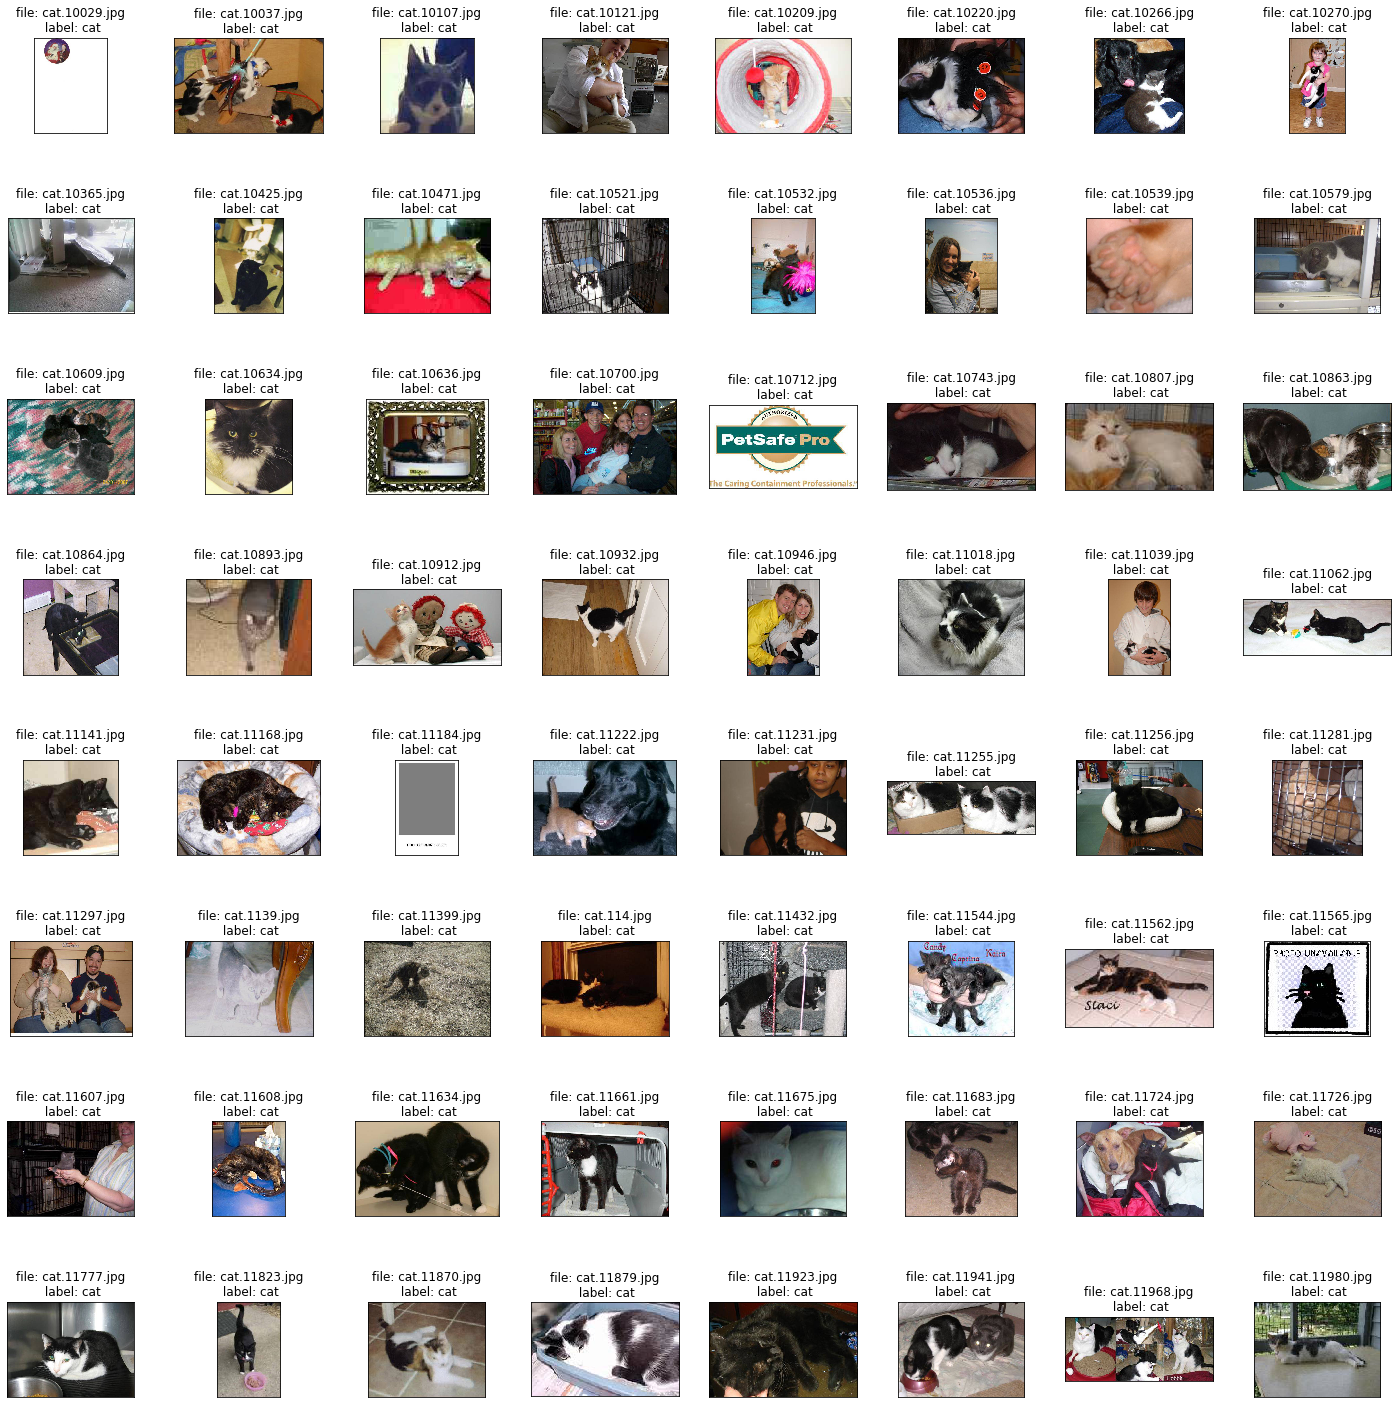

In [23]:
# view of the top 64 abnormal images
view_of_cheat_files(8, 8, 0, 64)

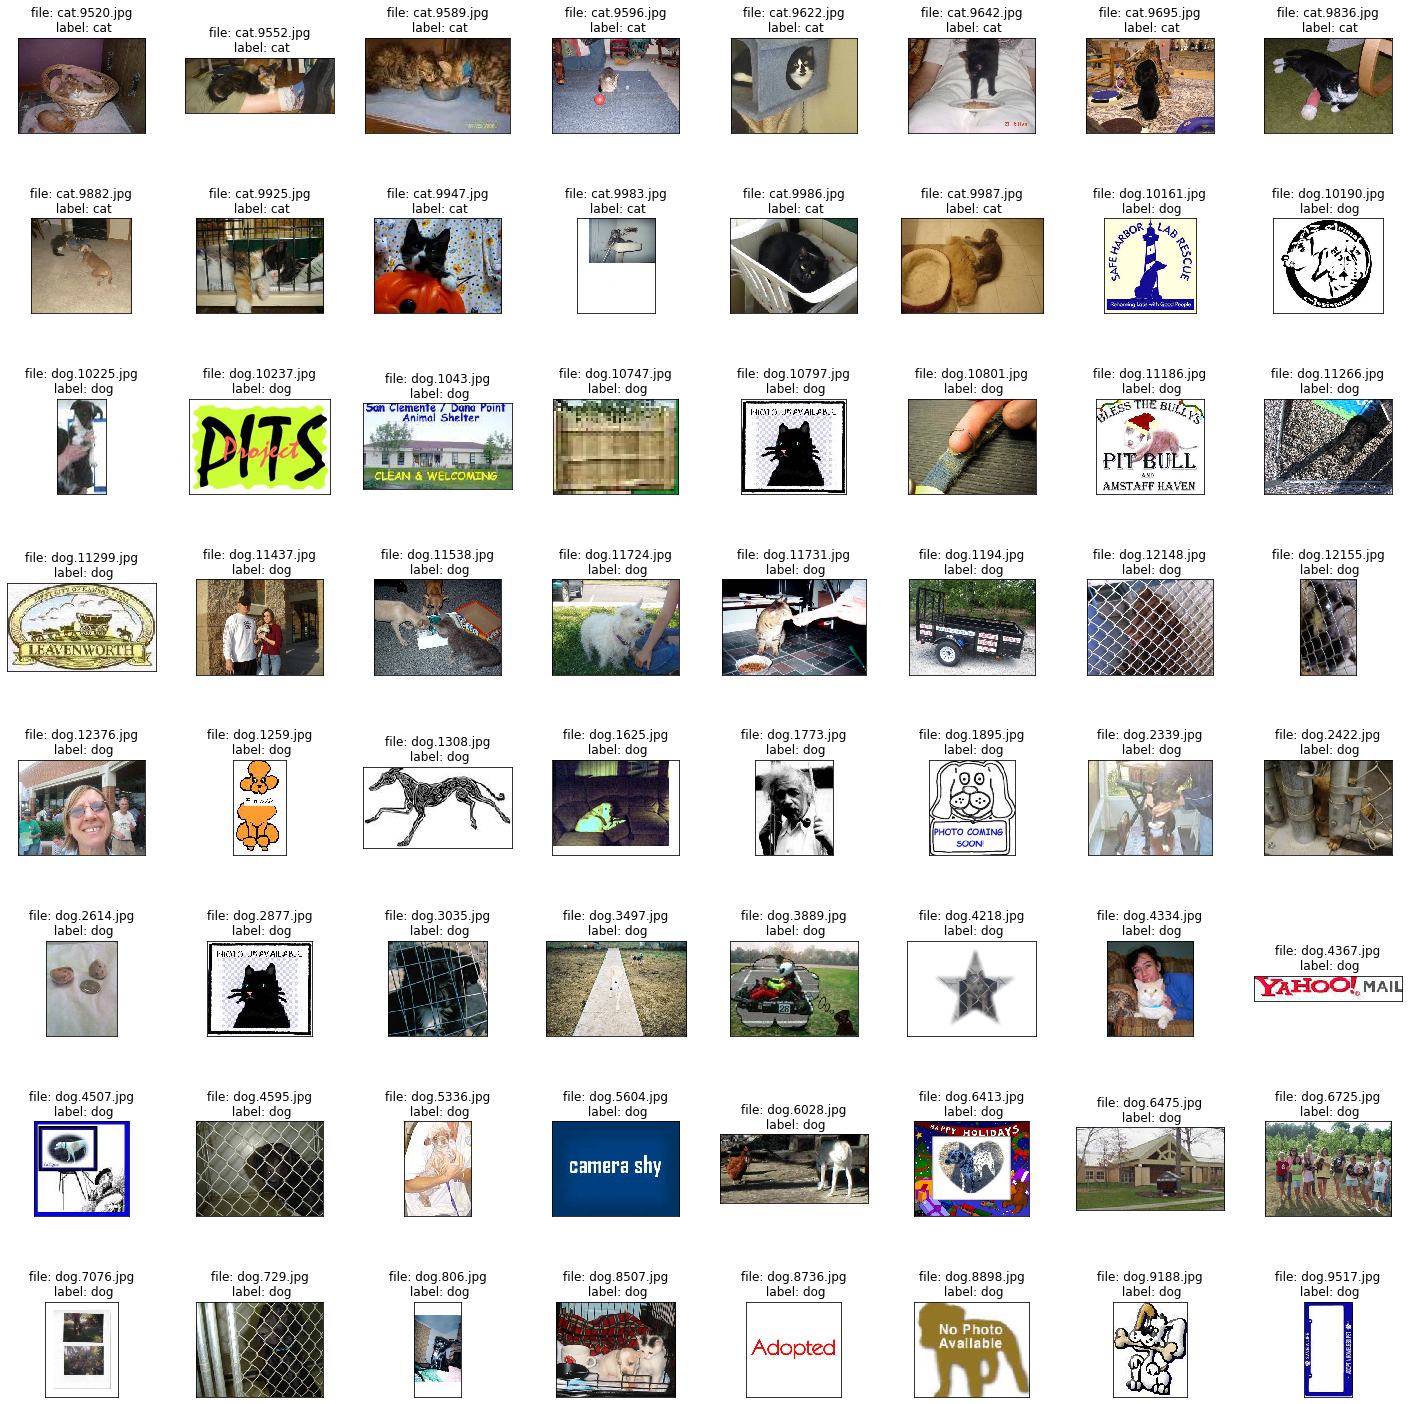

In [24]:
# view of the last 64 abnormal images
view_of_cheat_files(8, 8, -64, 0)

# -----------------------
# Dirty Data Removing
# -----------------------

In [8]:
# Remove above cheat files & bulid a dataframe
for file in cheatfiles_all:
    fnames.remove(file)

df = pd.DataFrame({
    'file': fnames,
    'label': [name.split('.')[0] for name in fnames]
})
df.head()

file label
0   cat.2960.jpg   cat
1  dog.11107.jpg   dog
2   cat.3056.jpg   cat
3  cat.12279.jpg   cat
4   dog.7786.jpg   dog

In [26]:
# Save as csv file
df.to_csv('data_clean.csv', index=False)

# Training Set & Validation Set


In [5]:
df = pd.read_csv('data_clean.csv')
df.head()

file label
0   cat.2960.jpg   cat
1  dog.11107.jpg   dog
2   cat.3056.jpg   cat
3  cat.12279.jpg   cat
4   dog.7786.jpg   dog

In [10]:
from sklearn.model_selection import train_test_split


# Dataframe of training set & validation set
df_trn, df_val = train_test_split(df, stratify=df['label'], random_state=0)
df_trn.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)

In [11]:
def show_images_from_df(data_df, nrows, ncols, directory=FOLDER_TRN, is_train=True, pred_label=None):
    """
        showing images from dataframe.
    """
    
    fig, ax = plt.subplots(nrows, ncols, figsize=(15, 15))
    plt.subplots_adjust(wspace=.4, hspace=.5)
    
    for idx, row in data_df[:nrows*ncols].iterrows():
        fname = row['file']
        prob = pred_label[idx] if not is_train else 1.000
        label = row['label'] if is_train  else ('dog' if prob > 0.500 else 'cat')
        img = plt.imread(os.path.join(directory, fname))
        
        ax[idx // ncols, idx % ncols].imshow(img)
        if is_train:
            ax[idx // ncols, idx % ncols].set_title("file: {}\n label: {}".format(fname, label), size=12)
        else:
            ax[idx // ncols, idx % ncols].set_title("file: {}\n prediction: {}\nprobability:{:.3f}".format(fname, label, prob), size=12)

        ax[idx // ncols, idx % ncols].get_xaxis().set_visible(False)
        ax[idx // ncols, idx % ncols].get_yaxis().set_visible(False)

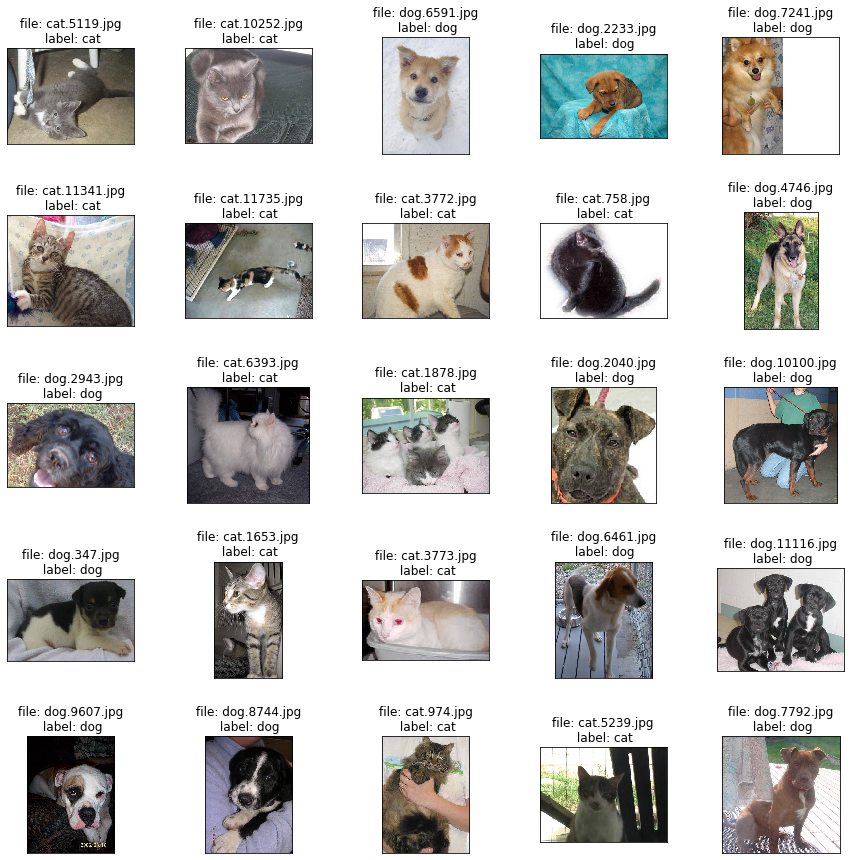

In [30]:
# Show images of training data
show_images_from_df(df_trn, 5, 5)

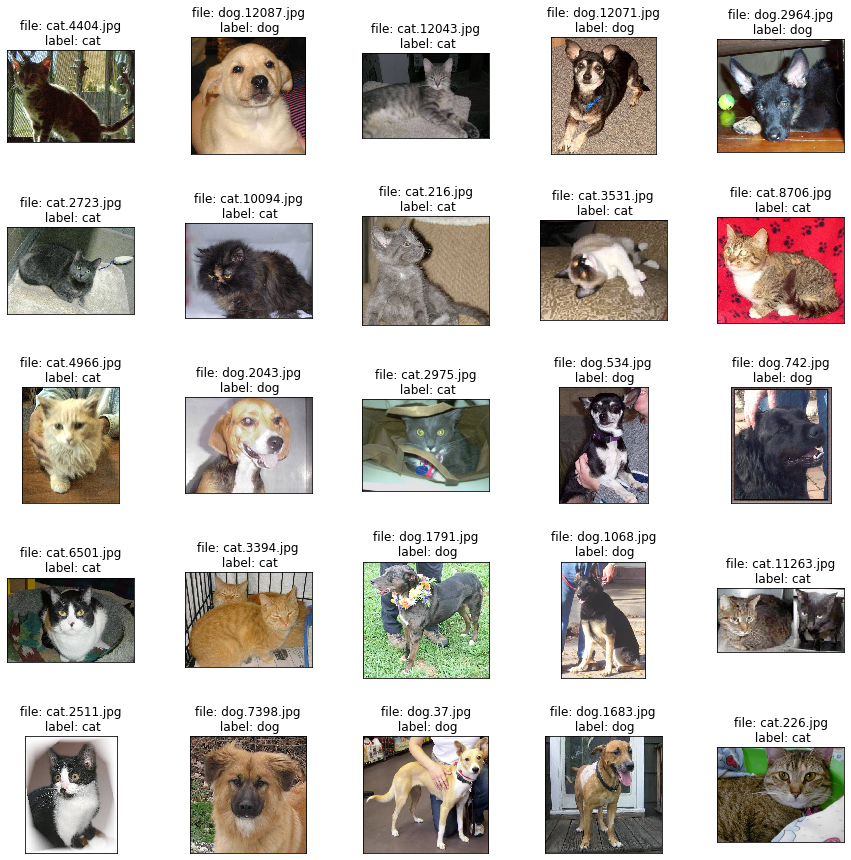

In [31]:
# Show images of validation data
show_images_from_df(df_val, 5, 5)

# Data Augmentation

In [12]:
from keras.preprocessing.image import ImageDataGenerator


# Batch size
BATCH_SIZE_331 = 16
BATCH_SIZE_299 = 32

# Image size
SIZE_299 = (299, 299)
SIZE_331 = (331, 331)

def generator_flow(
    datagen, df, target_size, batch_size,
    directory=FOLDER_TRN, x_col='file', y_col='label',
    mode='binary', shuffle=True
):
    gen = datagen.flow_from_dataframe(
        df, 
        directory=directory, 
        x_col=x_col,
        y_col=y_col, 
        target_size=target_size, 
        class_mode=mode,
        batch_size=batch_size,
        shuffle=shuffle
    )
    return gen

datagen_trn = ImageDataGenerator(
    rotation_range=25,
    
    width_shift_range=.1,
    height_shift_range=.1,
    zoom_range=.2,
    shear_range=.1,
    horizontal_flip=True
)
datagen_val = ImageDataGenerator()

In [13]:
# Data generator of training data & validation data with different size
generator_trn_331 = generator_flow(datagen_trn, df_trn, SIZE_331, BATCH_SIZE_331)
generator_val_331 = generator_flow(datagen_val, df_val, SIZE_331, BATCH_SIZE_331)
generator_trn_299 = generator_flow(datagen_trn, df_trn, SIZE_299, BATCH_SIZE_299)
generator_val_299 = generator_flow(datagen_val, df_val, SIZE_299, BATCH_SIZE_299)

Found 18429 images belonging to 2 classes.
Found 6143 images belonging to 2 classes.
Found 18429 images belonging to 2 classes.
Found 6143 images belonging to 2 classes.


In [83]:
# Class indices
print(generator_trn_331.class_indices)
print(generator_trn_299.class_indices)
print(generator_val_331.class_indices)
print(generator_val_299.class_indices)

{'cat': 0, 'dog': 1}
{'cat': 0, 'dog': 1}
{'cat': 0, 'dog': 1}
{'cat': 0, 'dog': 1}


In [14]:
# define a function for sorting the testing images in their directory by number in image name
import re


def key_func(entry):
    """
        sort files in their directory by number of its name.
    """
    return int(re.search(r'\d+', entry).group())

In [15]:
# Sort testing data
FOLDER_TEST = Path('test/')

fnames_tst = os.listdir(FOLDER_TEST)
fnames_tst.sort(key=key_func)
fnames_tst[:10]

['1.jpg',
 '2.jpg',
 '3.jpg',
 '4.jpg',
 '5.jpg',
 '6.jpg',
 '7.jpg',
 '8.jpg',
 '9.jpg',
 '10.jpg']

In [16]:
# Generator for testing data, set 'shuffle'=False
df_tst = pd.DataFrame({
    'file': fnames_tst
})
datagen_tst = ImageDataGenerator()
generator_tst_331 = generator_flow(datagen_tst, df_tst, (331, 331), 16, directory=FOLDER_TEST, y_col=None, mode=None, shuffle=False)
generator_tst_299 = generator_flow(datagen_tst, df_tst, SIZE_299, BATCH_SIZE_299, directory=FOLDER_TEST, y_col=None, mode=None, shuffle=False)

Found 12500 images.
Found 12500 images.
